# Proyek Klasifikasi Gambar: CIFAR-10 - Object Recognition in Images
- **Nama:** Renaldi Endrawan
- **Email:** mc129d5y1924@student.devacademy.id
- **ID Dicoding:** MC129D5Y1924

## Import Library


In [13]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Load dan Preprocessing Dataset CIFAR-10


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalisasi dan preprocessing
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Konversi label ke bentuk one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Daftar nama kelas
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Visualisasi Data


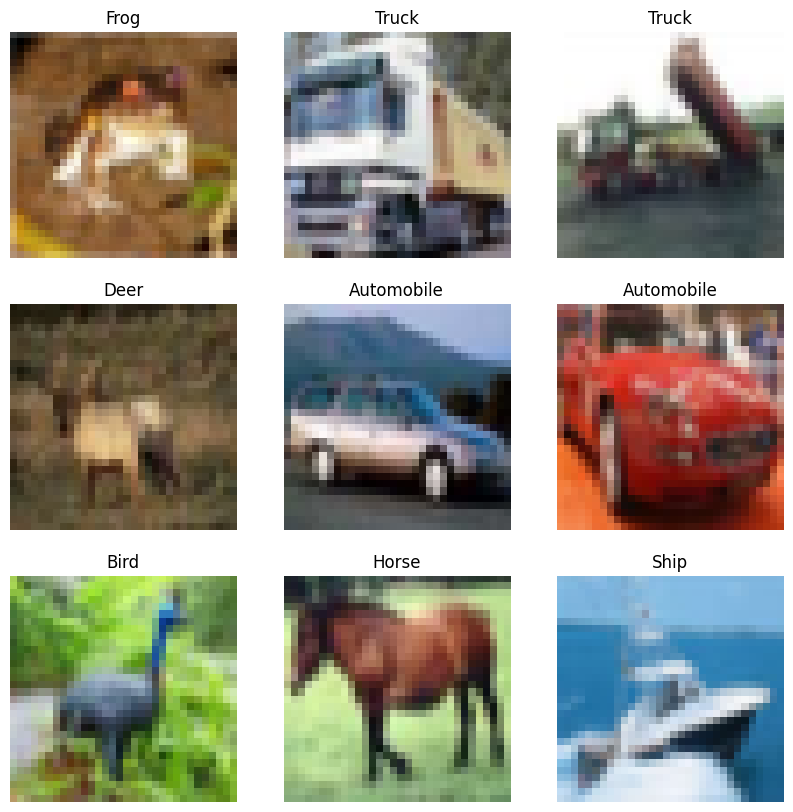

In [3]:
# Menampilkan 9 gambar pertama dari training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow((x_train[i]+1)/2)  # Mengembalikan nilai piksel ke [0,1]
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

## Membangun Model dengan Transfer Learning (MobileNetV2)


In [4]:
# Inisialisasi base model MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Membekukan layer base model
base_model.trainable = False

# Menambahkan layer klasifikasi
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

<ipython-input-4-30752c2a6145>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Pelatihan Model


In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.2217 - loss: 2.1306 - val_accuracy: 0.2890 - val_loss: 1.9586
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2797 - loss: 1.9712 - val_accuracy: 0.2941 - val_loss: 1.9310
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2894 - loss: 1.9459 - val_accuracy: 0.2964 - val_loss: 1.9198
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2981 - loss: 1.9246 - val_accuracy: 0.3002 - val_loss: 1.9131
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2937 - loss: 1.9286 - val_accuracy: 0.3007 - val_loss: 1.9091
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3035 - loss: 1.9053 - val_accuracy: 0.3007 - val_loss: 1.9042
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3065 - loss: 1.8985 - val_accuracy: 0.3029 - val_loss: 1.9021
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3065 - loss: 1.8948 - val_accurac

## Evaluasi Model


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3089 - loss: 1.8920
Test Accuracy: 30.58%


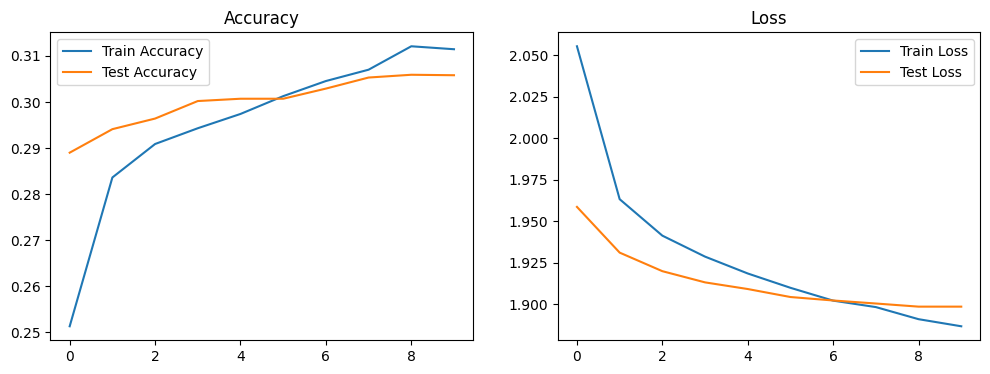

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


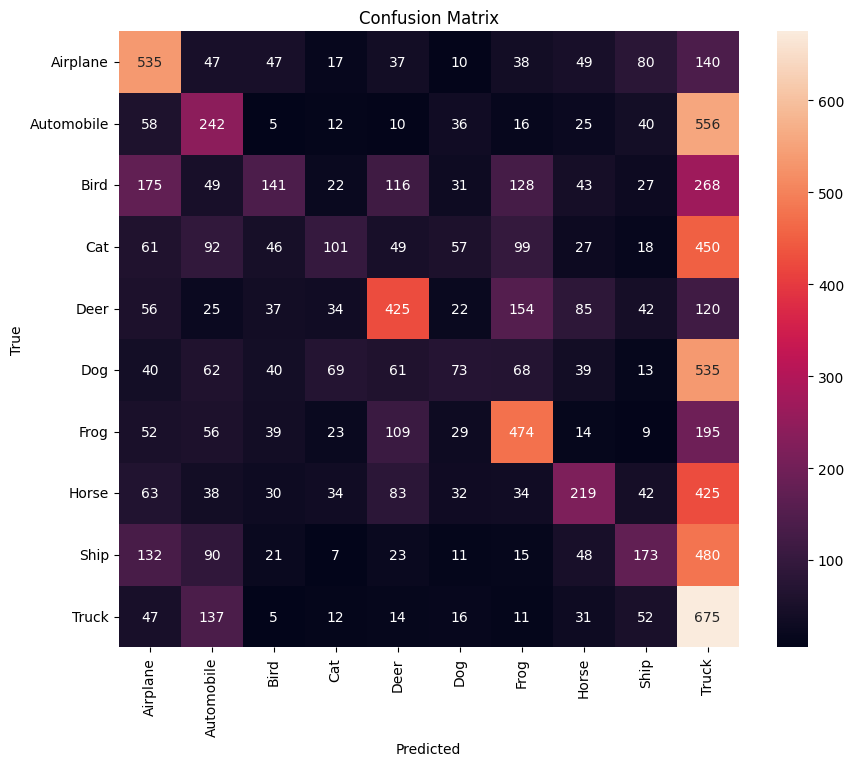

In [6]:
# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Plot akurasi dan loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Fungsi Inference


In [7]:
def predict_image(image):
    """
    Memprediksi kelas dari citra input.
    Parameter:
        image: array numpy dengan shape (32,32,3)
    Output:
        Nama kelas yang diprediksi
    """
    img = preprocess_input(image)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return class_names[class_idx]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


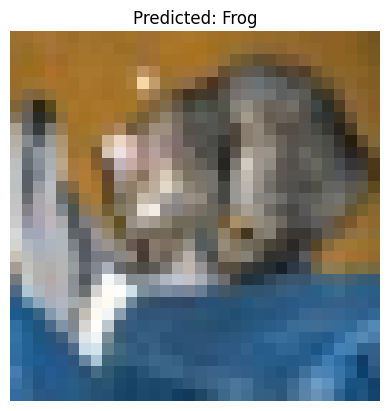

In [8]:
# Menggunakan gambar dari test set
sample_image = x_test[0]
plt.imshow((sample_image+1)/2)
plt.title("Predicted: " + predict_image(sample_image))
plt.axis('off')
plt.show()

## Save Model

In [14]:
# Path untuk masing-masing format
saved_model_path = "saved_model"
tflite_model_dir = "tflite_model"
tfjs_model_dir = "tfjs_model"

# Simpan model dalam format SavedModel
model.export(saved_model_path)  # Asumsikan 'model' sudah didefinisikan sebelumnya

# Konversi dan simpan ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Pastikan folder untuk TFLite ada
os.makedirs(tflite_model_dir, exist_ok=True)
with open(os.path.join(tflite_model_dir, "model.tflite"), "wb") as f:
    f.write(tflite_model)

# Konversi dan simpan ke format TensorFlow.js
os.system(f"tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model "
          f"--saved_model_tags=serve {saved_model_path} {tfjs_model_dir}")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135572551390736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551395344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551398800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551398416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551397456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551398992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551398032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551394960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551399184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551397648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135572551399568:

0